# **Importing Libraries**

In [5]:
import numpy as np
import cv2
import glob
import imutils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# **Key Point Matching**

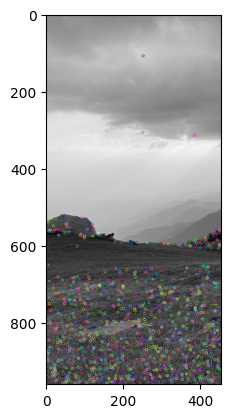

In [8]:
image1=cv2.imread('/content/unstitchedImgs/1SS.jpeg')
gray1=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp1, descriptor1 = sift.detectAndCompute(image1, None)
image_draw1=cv2.drawKeypoints(gray1, kp1, image1)
plt.imshow(image_draw1)

In [9]:
len(kp1)

1354

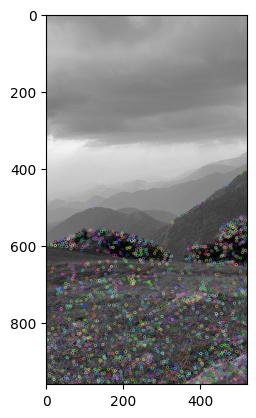

In [10]:
image2=cv2.imread('/content/unstitchedImgs/2SS.jpeg')
gray2=cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp2, descriptor2 = sift.detectAndCompute(image2, None)
image_draw2=cv2.drawKeypoints(gray2, kp2, image2)
plt.imshow(image_draw2)

In [11]:
len(kp2)

2033

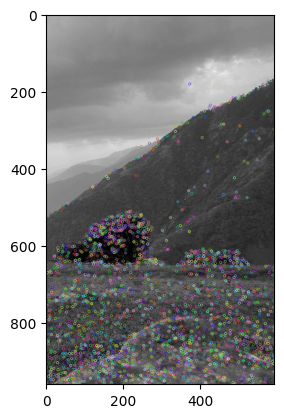

In [12]:
image3=cv2.imread('/content/unstitchedImgs/3SS.jpeg')
gray3=cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
sift=cv2.xfeatures2d.SIFT_create()
kp3, descriptor3 = sift.detectAndCompute(image3, None)
image_draw3=cv2.drawKeypoints(gray3, kp3, image3)
plt.imshow(image_draw3)

In [13]:
len(kp3)

2714

# **Matching the 3 images**

In [14]:
bf_matcher=cv2.BFMatcher() #Brute force matcher
matches=bf_matcher.match(descriptor1,descriptor2)
matches[0].distance

184.36376953125

In [15]:
matches=sorted(matches,key=lambda val:val.distance)
matches[0].distance

15.42724895477295

In [16]:
len(matches) #Since min distance taken, length of matches is the greater.

1354

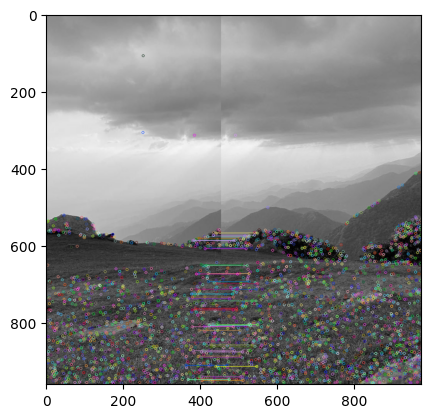

In [17]:
matched_image=cv2.drawMatches(image1, kp1, image2,kp2,matches[:50],None,flags=2)
plt.imshow(matched_image)

In [18]:
bf_matcher=cv2.BFMatcher() #Brute force matcher
matches2=bf_matcher.match(descriptor2,descriptor3)
matches2[0].distance

300.6459655761719

In [19]:
matches2=sorted(matches2,key=lambda val:val.distance)
matches2[0].distance

7.348469257354736

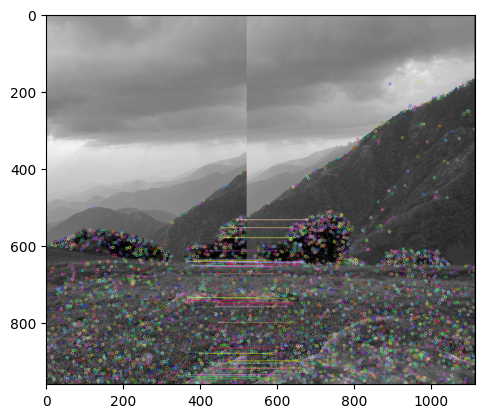

In [20]:
matched_image=cv2.drawMatches(image2, kp2, image3,kp3,matches2[:50],None,flags=2)
plt.imshow(matched_image)

# **Image Stitching**

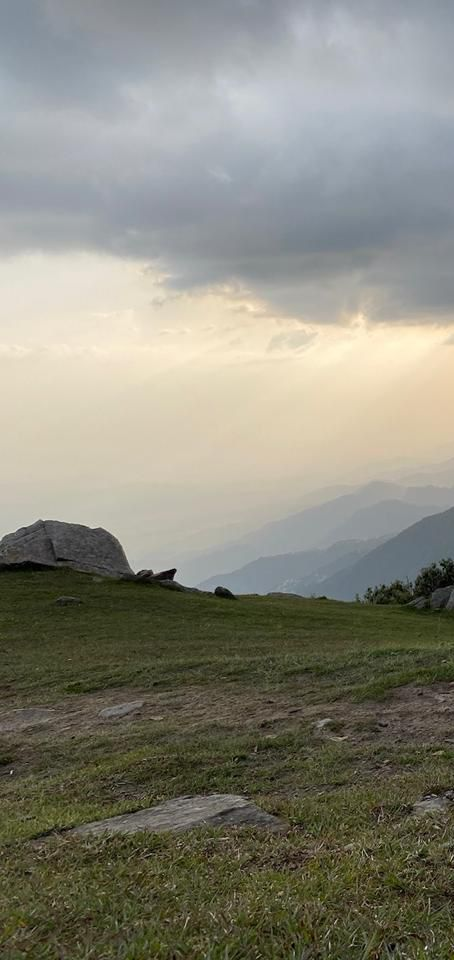

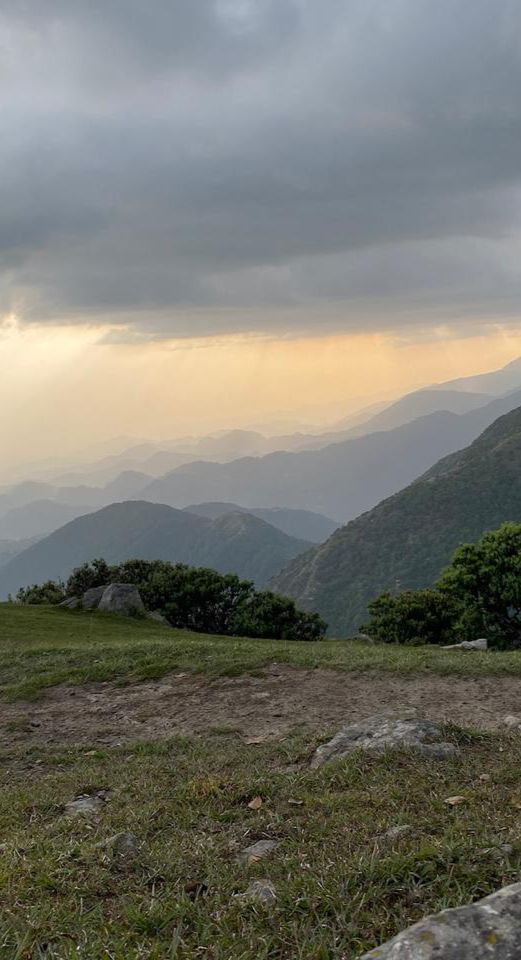

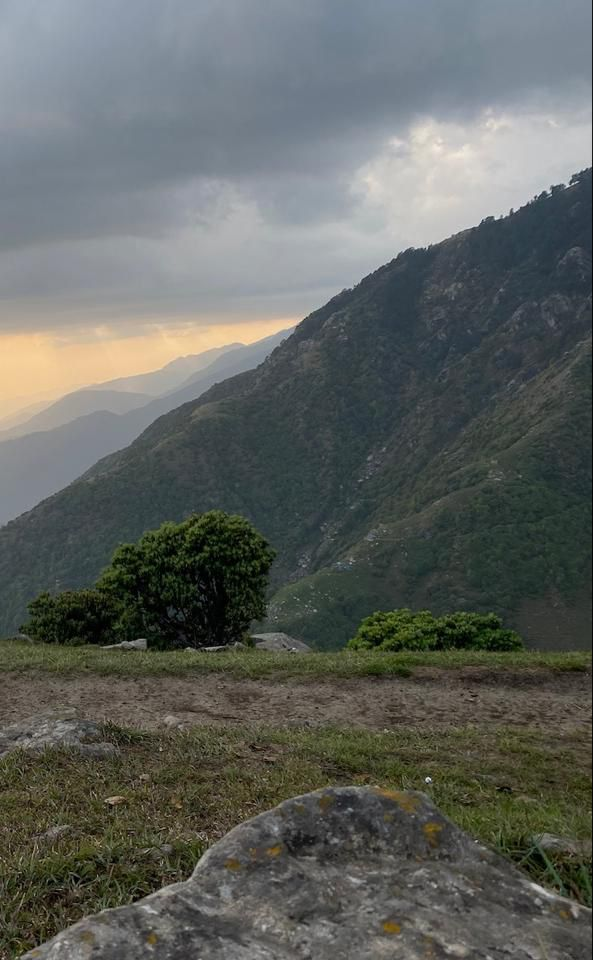

In [6]:
image_paths=glob.glob('/content/unstitchedImgs/*.jpeg')
images=[]
for image in image_paths:
  img= cv2.imread(image)
  images.append(img)
  cv2_imshow(img)
  cv2.waitKey(0)

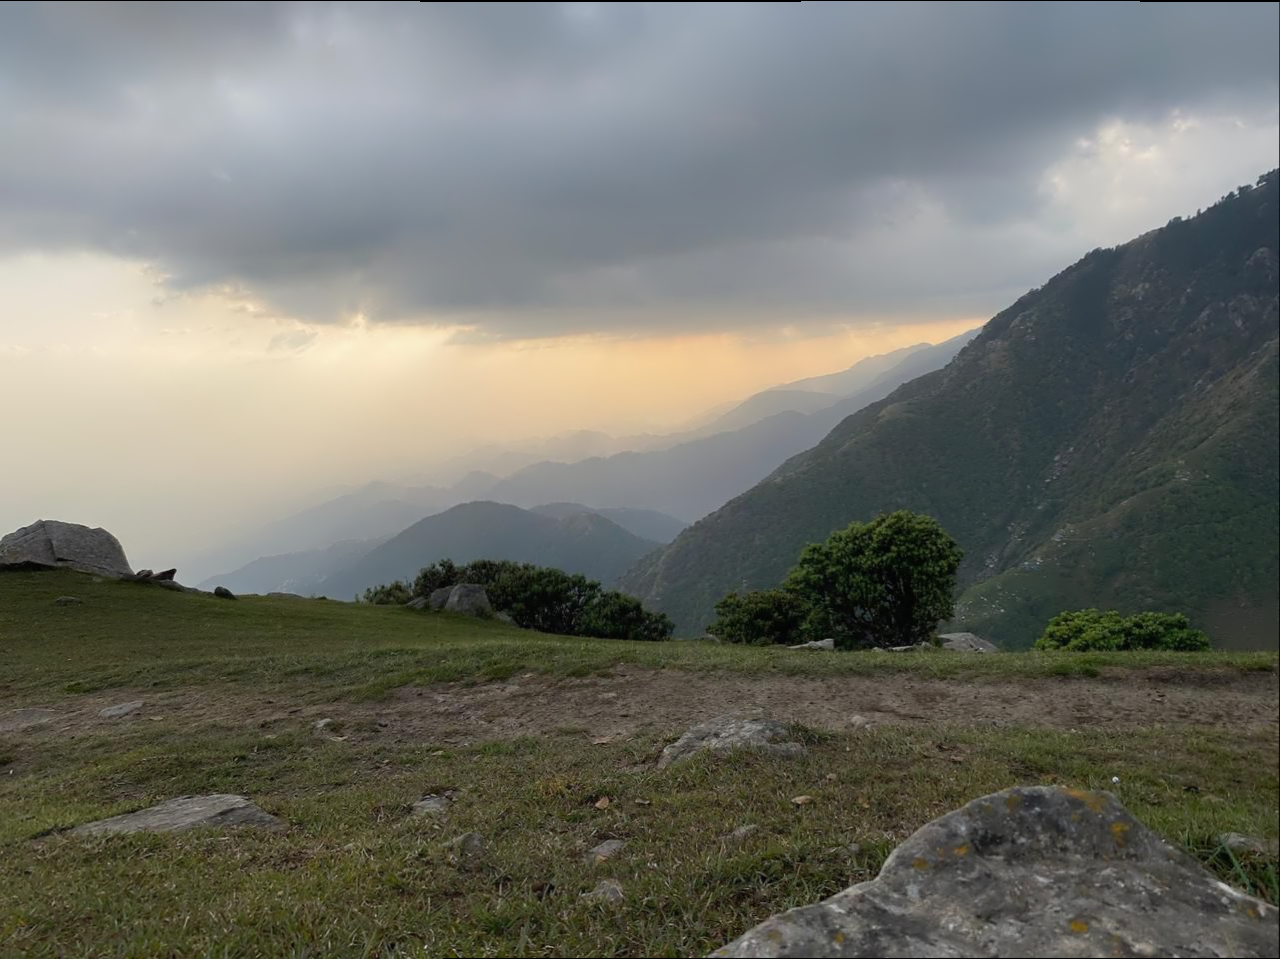

STITCHED IMAGE None


In [7]:
imageStitcher=cv2.Stitcher_create()

error, stitched_img= imageStitcher.stitch(images)


if not error:

  cv2.imwrite("stitched_output.jpeg", stitched_img)
  print("STITCHED IMAGE",cv2_imshow(stitched_img))
  cv2.waitKey(0)